In [2]:
import pandas as pd
import numpy as np
from funciones import *
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
from shapely.geometry import Point, LineString, Polygon

In [4]:
barrios = gpd.read_file(r'..\data\geo_data\Barrios\Barrios.shp')

In [5]:
estacionex = gpd.read_file(r'..\data\geo_data\estaciones.geojson')

In [6]:
carriles = gpd.read_file(r'..\data\geo_data\Infraestructura_Ciclista\Infraestructura_Ciclista.shp')

In [7]:
#carriles = carriles.to_crs(4326) 

In [8]:
estacionex = estacionex.to_crs(25830)

In [9]:
estacionex

,id,number,name,longitude,latitude,address,total_bases,geometry
0,1,1a,Puerta del Sol A,-3.7024255,40.4172137,Puerta del Sol nº 1,30,POINT (440407.435 4474302.375)
1,2,1b,Puerta del Sol B,-3.7024207,40.4170009,Puerta del Sol nº 1,30,POINT (440407.654 4474278.751)
2,3,2,Miguel Moya,-3.7058415,40.4205886,Calle Miguel Moya nº 1,24,POINT (440120.617 4474679.297)
3,4,3,Plaza Conde Suchil,-3.7069171,40.4302937,Plaza del Conde del Valle de Súchil nº 3,18,POINT (440037.988 4475757.290)
4,5,4,Malasaña,-3.7025875,40.4285524,Calle Manuela Malasaña nº 5,24,POINT (440403.699 4475561.076)
...,...,...,...,...,...,...,...,...
261,266,258,Ciudad Universitaria 1,-3.72699,40.44375,Avenida de la Complutense (Metro Ciudad Univer...,24,POINT (438347.647 4477264.758)
262,267,259,Ciudad Universitaria 2,-3.72693,40.44342,Avenida de la Complutense (Metro Ciudad Univer...,24,POINT (438352.434 4477228.086)
263,268,260,Facultad Biología,-3.72731,40.44912,"Jose Antonio Novais, frente al 12",24,POINT (438325.418 4477861.052)
264,269,261,Facultad Derecho,-3.72937,40.45109,"Avenida Complutense, 23",24,POINT (438152.538 4478081.164)


In [10]:
carriles.head()

,TIPO_VIA,ID_VIA,TIPOLOGÍA,DIRECCIÓN,SENTIDO,PENDIENTE,PENDIENTE_,COD_TIPOLO,COD_TIPO_V,Shape_STLe,d_COD_TIPO,d_COD_TI_1,geometry
0,CICLOCARRIL,0.0,VÍA USO COMPARTIDO,Avenida de Valladolid,None,None,0.0,5,19,1102.498490,VÍA USO COMPARTIDO,"VÍA USO COMPARTIDO, CICLOCARRIL","LINESTRING Z (437719.596 4476171.279 0.000, 43..."
1,CICLOCARRIL,1.0,VÍA USO COMPARTIDO,Avenida de Valladolid,None,None,0.0,5,19,1105.274193,VÍA USO COMPARTIDO,"VÍA USO COMPARTIDO, CICLOCARRIL","LINESTRING Z (437725.280 4476179.411 0.000, 43..."
2,CICLOCARRIL,2.0,VÍA USO COMPARTIDO,Paseo de la Virgen del Puerto,None,None,0.0,5,19,1044.939833,VÍA USO COMPARTIDO,"VÍA USO COMPARTIDO, CICLOCARRIL","LINESTRING Z (438833.498 4473930.951 0.000, 43..."
3,CICLOCARRIL,3.0,VÍA USO COMPARTIDO,Calle de Juan Duque,None,None,0.0,5,19,567.611720,VÍA USO COMPARTIDO,"VÍA USO COMPARTIDO, CICLOCARRIL","LINESTRING Z (438943.335 4473376.361 0.000, 43..."
4,CICLOCARRIL,4.0,VÍA USO COMPARTIDO,Avenida de la Albufera,None,None,0.0,5,19,2735.758322,VÍA USO COMPARTIDO,"VÍA USO COMPARTIDO, CICLOCARRIL","LINESTRING Z (445628.922 4470978.234 0.000, 44..."


In [11]:
carriles.TIPOLOGÍA.value_counts()

VÍA USO COMPARTIDO       653
VÍA EXCLUSIVA BICI       433
ANILLO VERDE CICLISTA     50
VÍA PREFERENTE BICI        9
GIROS Y SENTIDOS           6
Name: TIPOLOGÍA, dtype: int64

In [12]:
carriles.TIPOLOGÍA = carriles.TIPOLOGÍA.str.replace('VÍA EXCLUSIVA BICI', 'BICI')
carriles.TIPOLOGÍA = carriles.TIPOLOGÍA.str.replace('ANILLO VERDE CICLISTA', 'BICI')
carriles.TIPOLOGÍA = carriles.TIPOLOGÍA.str.replace('VÍA PREFERENTE BICI', 'BICI')
carriles.TIPOLOGÍA = carriles.TIPOLOGÍA.str.replace('GIROS Y SENTIDOS', 'BICI')

In [13]:
carriles.TIPOLOGÍA.value_counts()

VÍA USO COMPARTIDO    653
BICI                  498
Name: TIPOLOGÍA, dtype: int64

In [14]:
carriles_1 = carriles[['TIPOLOGÍA', 'geometry']].dissolve(by='TIPOLOGÍA')

In [15]:
carriles_1

,geometry
TIPOLOGÍA,
BICI,MULTILINESTRING Z ((448462.161 4469869.424 0.0...
VÍA USO COMPARTIDO,MULTILINESTRING Z ((437719.596 4476171.279 0.0...


In [16]:
buf = estacionex.buffer(500)

In [17]:
buf1 = buf.to_frame().join(estacionex[['id','name']])

In [18]:
buf1

,0,id,name
0,"POLYGON ((440907.435 4474302.375, 440905.027 4...",1,Puerta del Sol A
1,"POLYGON ((440907.654 4474278.751, 440905.247 4...",2,Puerta del Sol B
2,"POLYGON ((440620.617 4474679.297, 440618.210 4...",3,Miguel Moya
3,"POLYGON ((440537.988 4475757.290, 440535.581 4...",4,Plaza Conde Suchil
4,"POLYGON ((440903.699 4475561.076, 440901.291 4...",5,Malasaña
...,...,...,...
261,"POLYGON ((438847.647 4477264.758, 438845.239 4...",266,Ciudad Universitaria 1
262,"POLYGON ((438852.434 4477228.086, 438850.026 4...",267,Ciudad Universitaria 2
263,"POLYGON ((438825.418 4477861.052, 438823.010 4...",268,Facultad Biología
264,"POLYGON ((438652.538 4478081.164, 438650.130 4...",269,Facultad Derecho


In [19]:
corte  = buf1.sjoin(carriles_1, predicate='intersects', how='left')

In [20]:
corte.shape, buf.shape 

((463, 4), (266,))

In [21]:
'''
corte = corte.reset_index()

corte['id'] = corte['index'] + 1

'''



"\ncorte = corte.reset_index()\n\ncorte['id'] = corte['index'] + 1\n\n"

In [22]:
corte

,0,id,name,index_right
0,"POLYGON ((440907.435 4474302.375, 440905.027 4...",1,Puerta del Sol A,VÍA USO COMPARTIDO
0,"POLYGON ((440907.435 4474302.375, 440905.027 4...",1,Puerta del Sol A,BICI
1,"POLYGON ((440907.654 4474278.751, 440905.247 4...",2,Puerta del Sol B,VÍA USO COMPARTIDO
1,"POLYGON ((440907.654 4474278.751, 440905.247 4...",2,Puerta del Sol B,BICI
2,"POLYGON ((440620.617 4474679.297, 440618.210 4...",3,Miguel Moya,VÍA USO COMPARTIDO
...,...,...,...,...
261,"POLYGON ((438847.647 4477264.758, 438845.239 4...",266,Ciudad Universitaria 1,BICI
262,"POLYGON ((438852.434 4477228.086, 438850.026 4...",267,Ciudad Universitaria 2,BICI
263,"POLYGON ((438825.418 4477861.052, 438823.010 4...",268,Facultad Biología,BICI
264,"POLYGON ((438652.538 4478081.164, 438650.130 4...",269,Facultad Derecho,BICI


In [23]:
cross=pd.crosstab(index=corte.id , columns=corte.index_right)

In [24]:
cross

index_right,BICI,VÍA USO COMPARTIDO
id,,
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
...,...,...
266,1,0
267,1,0
268,1,0


In [25]:
cross.reset_index(inplace = True)

In [26]:
cross.set_index('id', inplace = True)

In [27]:
cross

index_right,BICI,VÍA USO COMPARTIDO
id,,
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
...,...,...
266,1,0
267,1,0
268,1,0


In [28]:
estacionex.head()

,id,number,name,longitude,latitude,address,total_bases,geometry
0,1,1a,Puerta del Sol A,-3.7024255,40.4172137,Puerta del Sol nº 1,30,POINT (440407.435 4474302.375)
1,2,1b,Puerta del Sol B,-3.7024207,40.4170009,Puerta del Sol nº 1,30,POINT (440407.654 4474278.751)
2,3,2,Miguel Moya,-3.7058415,40.4205886,Calle Miguel Moya nº 1,24,POINT (440120.617 4474679.297)
3,4,3,Plaza Conde Suchil,-3.7069171,40.4302937,Plaza del Conde del Valle de Súchil nº 3,18,POINT (440037.988 4475757.290)
4,5,4,Malasaña,-3.7025875,40.4285524,Calle Manuela Malasaña nº 5,24,POINT (440403.699 4475561.076)


In [29]:
estacionex = estacionex.join(cross, on = 'id')

In [30]:
estacionex

,id,number,name,longitude,latitude,address,total_bases,geometry,BICI,VÍA USO COMPARTIDO
0,1,1a,Puerta del Sol A,-3.7024255,40.4172137,Puerta del Sol nº 1,30,POINT (440407.435 4474302.375),1.0,1.0
1,2,1b,Puerta del Sol B,-3.7024207,40.4170009,Puerta del Sol nº 1,30,POINT (440407.654 4474278.751),1.0,1.0
2,3,2,Miguel Moya,-3.7058415,40.4205886,Calle Miguel Moya nº 1,24,POINT (440120.617 4474679.297),1.0,1.0
3,4,3,Plaza Conde Suchil,-3.7069171,40.4302937,Plaza del Conde del Valle de Súchil nº 3,18,POINT (440037.988 4475757.290),1.0,1.0
4,5,4,Malasaña,-3.7025875,40.4285524,Calle Manuela Malasaña nº 5,24,POINT (440403.699 4475561.076),1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
261,266,258,Ciudad Universitaria 1,-3.72699,40.44375,Avenida de la Complutense (Metro Ciudad Univer...,24,POINT (438347.647 4477264.758),1.0,0.0
262,267,259,Ciudad Universitaria 2,-3.72693,40.44342,Avenida de la Complutense (Metro Ciudad Univer...,24,POINT (438352.434 4477228.086),1.0,0.0
263,268,260,Facultad Biología,-3.72731,40.44912,"Jose Antonio Novais, frente al 12",24,POINT (438325.418 4477861.052),1.0,0.0
264,269,261,Facultad Derecho,-3.72937,40.45109,"Avenida Complutense, 23",24,POINT (438152.538 4478081.164),1.0,0.0


In [31]:
lista= []
for e in range(0, 266):
    if estacionex.BICI[e] == 1 or estacionex['VÍA USO COMPARTIDO'][e] == 1:
        lista.append(1)
    else:
        lista.append(0)



In [32]:
estacionex['ambas']= lista

In [33]:
estacionex

,id,number,name,longitude,latitude,address,total_bases,geometry,BICI,VÍA USO COMPARTIDO,ambas
0,1,1a,Puerta del Sol A,-3.7024255,40.4172137,Puerta del Sol nº 1,30,POINT (440407.435 4474302.375),1.0,1.0,1
1,2,1b,Puerta del Sol B,-3.7024207,40.4170009,Puerta del Sol nº 1,30,POINT (440407.654 4474278.751),1.0,1.0,1
2,3,2,Miguel Moya,-3.7058415,40.4205886,Calle Miguel Moya nº 1,24,POINT (440120.617 4474679.297),1.0,1.0,1
3,4,3,Plaza Conde Suchil,-3.7069171,40.4302937,Plaza del Conde del Valle de Súchil nº 3,18,POINT (440037.988 4475757.290),1.0,1.0,1
4,5,4,Malasaña,-3.7025875,40.4285524,Calle Manuela Malasaña nº 5,24,POINT (440403.699 4475561.076),1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
261,266,258,Ciudad Universitaria 1,-3.72699,40.44375,Avenida de la Complutense (Metro Ciudad Univer...,24,POINT (438347.647 4477264.758),1.0,0.0,1
262,267,259,Ciudad Universitaria 2,-3.72693,40.44342,Avenida de la Complutense (Metro Ciudad Univer...,24,POINT (438352.434 4477228.086),1.0,0.0,1
263,268,260,Facultad Biología,-3.72731,40.44912,"Jose Antonio Novais, frente al 12",24,POINT (438325.418 4477861.052),1.0,0.0,1
264,269,261,Facultad Derecho,-3.72937,40.45109,"Avenida Complutense, 23",24,POINT (438152.538 4478081.164),1.0,0.0,1


In [34]:
estacionex['ambas'].value_counts()

1    264
0      2
Name: ambas, dtype: int64

In [35]:
estacionex.loc[estacionex['ambas'] == 2,'ambas'] = 1

In [36]:
estacionex

,id,number,name,longitude,latitude,address,total_bases,geometry,BICI,VÍA USO COMPARTIDO,ambas
0,1,1a,Puerta del Sol A,-3.7024255,40.4172137,Puerta del Sol nº 1,30,POINT (440407.435 4474302.375),1.0,1.0,1
1,2,1b,Puerta del Sol B,-3.7024207,40.4170009,Puerta del Sol nº 1,30,POINT (440407.654 4474278.751),1.0,1.0,1
2,3,2,Miguel Moya,-3.7058415,40.4205886,Calle Miguel Moya nº 1,24,POINT (440120.617 4474679.297),1.0,1.0,1
3,4,3,Plaza Conde Suchil,-3.7069171,40.4302937,Plaza del Conde del Valle de Súchil nº 3,18,POINT (440037.988 4475757.290),1.0,1.0,1
4,5,4,Malasaña,-3.7025875,40.4285524,Calle Manuela Malasaña nº 5,24,POINT (440403.699 4475561.076),1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
261,266,258,Ciudad Universitaria 1,-3.72699,40.44375,Avenida de la Complutense (Metro Ciudad Univer...,24,POINT (438347.647 4477264.758),1.0,0.0,1
262,267,259,Ciudad Universitaria 2,-3.72693,40.44342,Avenida de la Complutense (Metro Ciudad Univer...,24,POINT (438352.434 4477228.086),1.0,0.0,1
263,268,260,Facultad Biología,-3.72731,40.44912,"Jose Antonio Novais, frente al 12",24,POINT (438325.418 4477861.052),1.0,0.0,1
264,269,261,Facultad Derecho,-3.72937,40.45109,"Avenida Complutense, 23",24,POINT (438152.538 4478081.164),1.0,0.0,1


In [37]:
estacionex.to_csv(r'..\data\est_vias.csv', index = False)

In [38]:
estacionex.to_file(r'..\data\geo_data\barrios.geojson', driver="GeoJSON") 

In [39]:
barrios.to_file(r'..\data\geo_data\barrios.geojson', driver="GeoJSON") 

In [40]:
cross.sum()

index_right
BICI                  205
VÍA USO COMPARTIDO    256
dtype: int64

In [41]:
corte[corte.isna().any(axis=1)] 

,0,id,name,index_right
219,"POLYGON ((445447.127 4477201.132, 445444.719 4...",223,Gutierrez de Cetina,NaN
234,"POLYGON ((445465.121 4477208.262, 445462.713 4...",238,Carlota O’Neill,NaN


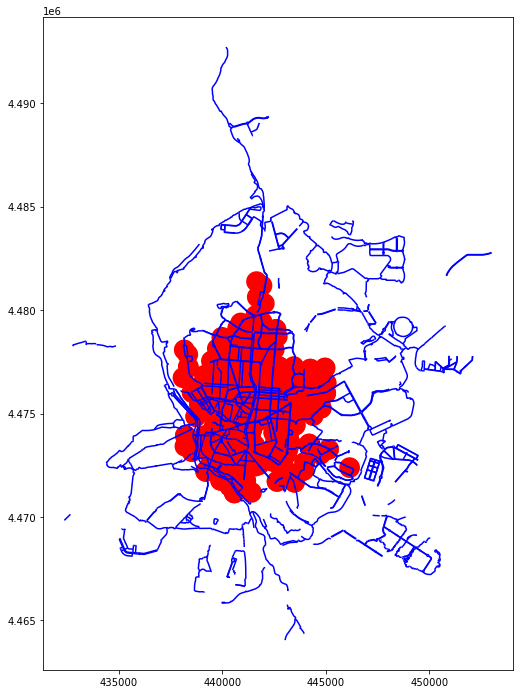

In [42]:
ax = carriles_1.plot(
    color='blue', figsize = (20,12))

corte.plot(ax=ax, color='red')

plt.show()

In [43]:
buf = estacionex.buffer(500)

In [44]:
buf

0      POLYGON ((440907.435 4474302.375, 440905.027 4...
1      POLYGON ((440907.654 4474278.751, 440905.247 4...
2      POLYGON ((440620.617 4474679.297, 440618.210 4...
3      POLYGON ((440537.988 4475757.290, 440535.581 4...
4      POLYGON ((440903.699 4475561.076, 440901.291 4...
                             ...                        
261    POLYGON ((438847.647 4477264.758, 438845.239 4...
262    POLYGON ((438852.434 4477228.086, 438850.026 4...
263    POLYGON ((438825.418 4477861.052, 438823.010 4...
264    POLYGON ((438652.538 4478081.164, 438650.130 4...
265    POLYGON ((441741.619 4476644.279, 441739.211 4...
Length: 266, dtype: geometry

In [45]:
buf1 = estacionex[estacionex.id == 1].buffer(500)

In [46]:
buf1.to_frame()

,0
0,"POLYGON ((440907.435 4474302.375, 440905.027 4..."


In [47]:
buf1.to_frame().sjoin(carriles, predicate='intersects')

,0,index_right,TIPO_VIA,ID_VIA,TIPOLOGÍA,DIRECCIÓN,SENTIDO,PENDIENTE,PENDIENTE_,COD_TIPOLO,COD_TIPO_V,Shape_STLe,d_COD_TIPO,d_COD_TI_1
0,"POLYGON ((440907.435 4474302.375, 440905.027 4...",131,CICLOCARRIL,135.0,VÍA USO COMPARTIDO,Calle de San Bartolomé,None,None,0.0,5,19,210.968328,VÍA USO COMPARTIDO,"VÍA USO COMPARTIDO, CICLOCARRIL"
0,"POLYGON ((440907.435 4474302.375, 440905.027 4...",127,CICLOCARRIL,131.0,VÍA USO COMPARTIDO,Calle del Barco,None,None,0.0,5,19,408.601067,VÍA USO COMPARTIDO,"VÍA USO COMPARTIDO, CICLOCARRIL"
0,"POLYGON ((440907.435 4474302.375, 440905.027 4...",48,CICLOCARRIL,51.0,VÍA USO COMPARTIDO,Calle de Hortaleza,None,None,0.0,5,19,792.864270,VÍA USO COMPARTIDO,"VÍA USO COMPARTIDO, CICLOCARRIL"
0,"POLYGON ((440907.435 4474302.375, 440905.027 4...",981,CICLOCARRIL,997.0,VÍA USO COMPARTIDO,Plaza de las Cortes,None,None,0.0,5,19,220.288532,VÍA USO COMPARTIDO,"VÍA USO COMPARTIDO, CICLOCARRIL"
0,"POLYGON ((440907.435 4474302.375, 440905.027 4...",980,CICLOCARRIL,996.0,VÍA USO COMPARTIDO,Carrera de San Jerónimo,None,None,0.0,5,19,478.834882,VÍA USO COMPARTIDO,"VÍA USO COMPARTIDO, CICLOCARRIL"
0,"POLYGON ((440907.435 4474302.375, 440905.027 4...",979,CICLOCARRIL,995.0,VÍA USO COMPARTIDO,Calle de Cedaceros,None,None,0.0,5,19,158.049506,VÍA USO COMPARTIDO,"VÍA USO COMPARTIDO, CICLOCARRIL"
0,"POLYGON ((440907.435 4474302.375, 440905.027 4...",1139,CICLOCARRIL,1155.0,VÍA USO COMPARTIDO,Calle de Alcalá,None,None,0.0,5,19,237.061308,VÍA USO COMPARTIDO,"VÍA USO COMPARTIDO, CICLOCARRIL"
0,"POLYGON ((440907.435 4474302.375, 440905.027 4...",370,CARRIL BICI,375.0,BICI,Calle de Alcalá,None,None,0.0,3,11,516.679525,VÍA EXCLUSIVA BICI,"VÍA EXCLUSIVA BICI, CARRIL BICI"
0,"POLYGON ((440907.435 4474302.375, 440905.027 4...",42,CICLOCARRIL,45.0,VÍA USO COMPARTIDO,Calle de Alcalá,None,None,0.0,5,19,504.047018,VÍA USO COMPARTIDO,"VÍA USO COMPARTIDO, CICLOCARRIL"
0,"POLYGON ((440907.435 4474302.375, 440905.027 4...",921,CICLOCARRIL,932.0,VÍA USO COMPARTIDO,Calle de la Virgen de los Peligros,None,None,0.0,5,19,190.478027,VÍA USO COMPARTIDO,"VÍA USO COMPARTIDO, CICLOCARRIL"


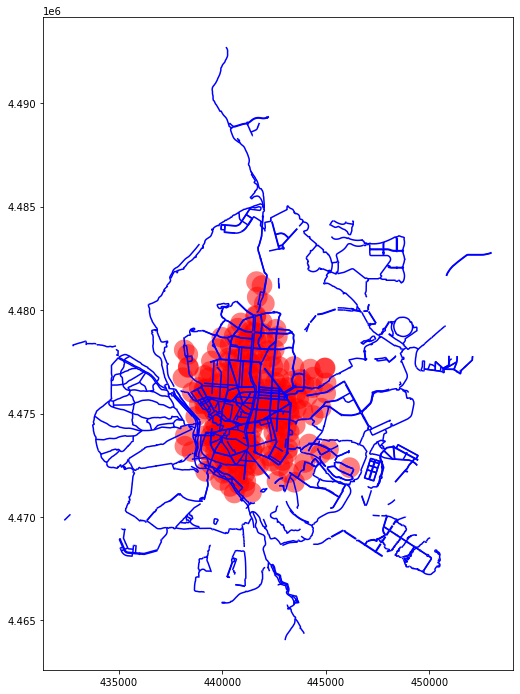

In [48]:
ax = ax = carriles.plot(
    color='blue', figsize = (20,12))

buf.plot(ax=ax, color='red', alpha = 0.5)

plt.show()

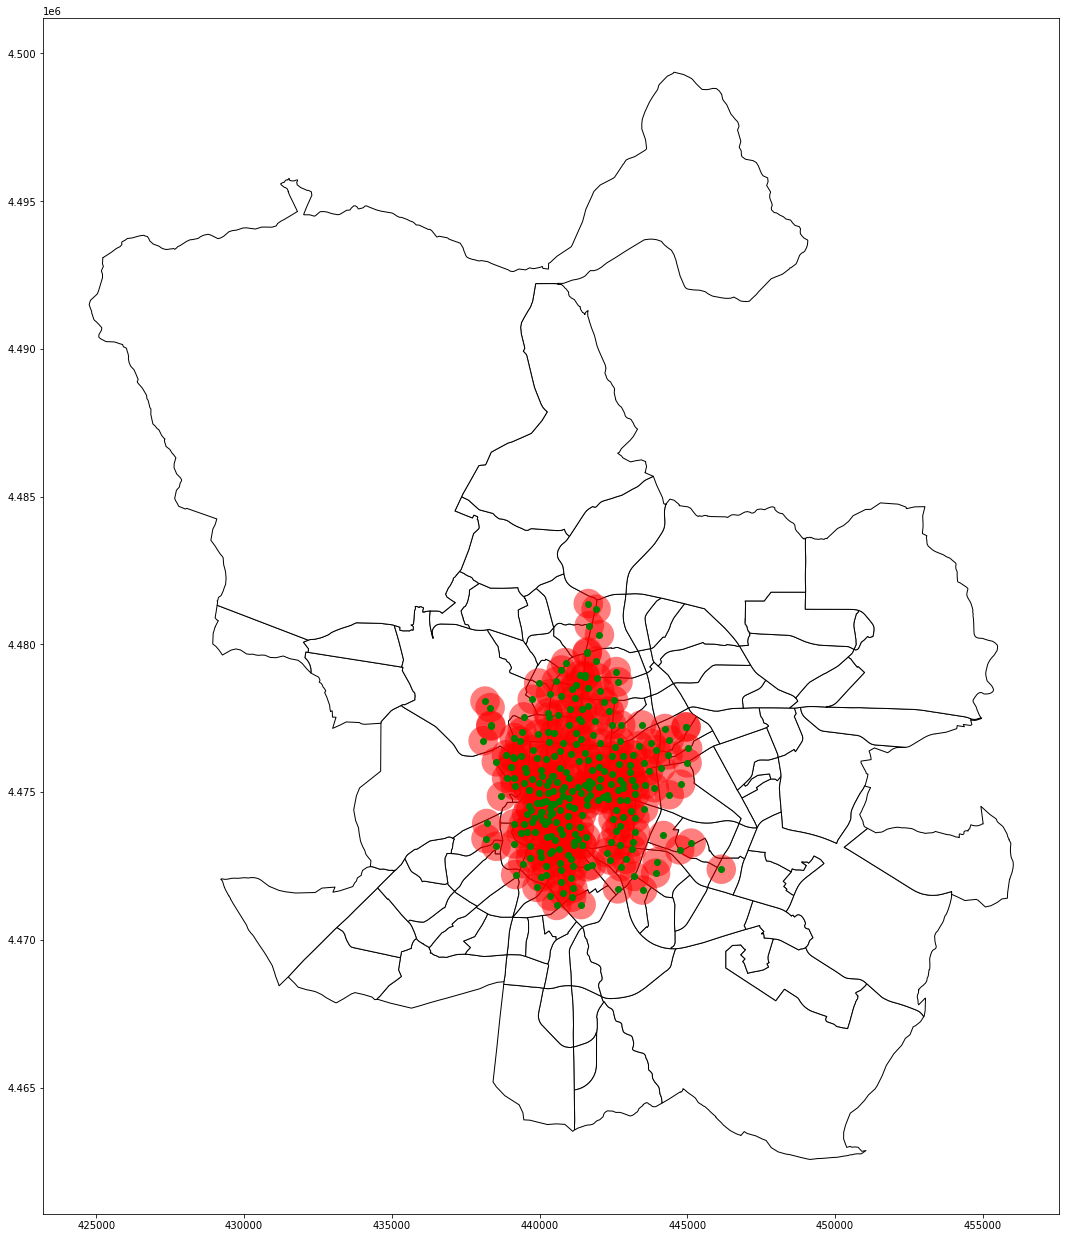

In [49]:
ax = barrios.plot(
    color='white', edgecolor='black', figsize = (30,22))

buf.plot(ax=ax, color='red', alpha = 0.5)
estacionex.plot(ax=ax, color='green')


plt.show()